### 📘 Comparing Parametric Weibull Fit and Non-Parametric Kaplan–Meier Estimate

This notebook demonstrates how to **compare a parametric Weibull reliability model** with a **non-parametric Kaplan–Meier estimator** using censored data.

We will:
1. Generate sample data from a known Weibull distribution.
2. Apply **right-censoring** to simulate incomplete life data (some items still working).
3. Fit a **Weibull_2P** distribution to the censored data.
4. Obtain the **Kaplan–Meier** estimate for the same data.
5. Plot the **Survival Function (SF)**, **Cumulative Distribution Function (CDF)**, and **Cumulative Hazard Function (CHF)** for both methods.

---

In [ ]:
# Import required libraries
from reliability.Distributions import Weibull_Distribution
from reliability.Fitters import Fit_Weibull_2P
from reliability.Nonparametric import KaplanMeier
from reliability.Other_functions import make_right_censored_data
import matplotlib.pyplot as plt

In [2]:
# Step 1: Create a Weibull distribution (known ground truth)
dist = Weibull_Distribution(alpha=5, beta=2)  # alpha=scale, beta=shape

# Step 2: Generate 100 random lifetimes from this distribution
raw_data = dist.random_samples(100, seed=2)  # seed for reproducibility

# Step 3: Apply right-censoring at 9 time units
# Any data above 9 is treated as "still operating" (right-censored)
data = make_right_censored_data(raw_data, threshold=9)

# Display summary
print("Number of failures:", len(data.failures))
print("Number of right-censored:", len(data.right_censored))

Number of failures: 95
Number of right-censored: 5


In [3]:
# Step 4: Fit a 2-Parameter Weibull distribution to censored data
wbf = Fit_Weibull_2P(
    failures=data.failures,
    right_censored=data.right_censored,
    show_probability_plot=False,
    print_results=False
)

print("Fitted Weibull parameters:")
print(f"Alpha (scale): {wbf.alpha:.3f}")
print(f"Beta (shape): {wbf.beta:.3f}")

Fitted Weibull parameters:
Alpha (scale): 4.664
Beta (shape): 2.009


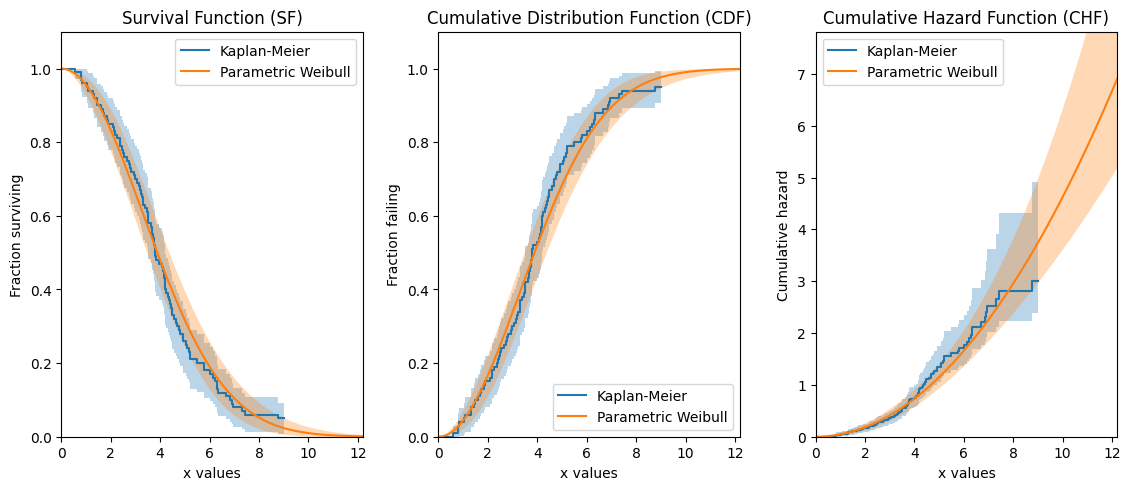

In [4]:
# Step 5: Compare Kaplan–Meier and Weibull fits visually
# Plot SF, CDF, and CHF for both methods side by side

plt.figure(figsize=(12, 5))

# Survival Function (SF)
plt.subplot(131)
KaplanMeier(
    failures=data.failures,
    right_censored=data.right_censored,
    plot_type='SF',
    print_results=False,
    label='Kaplan-Meier'
)
wbf.distribution.SF(label='Parametric Weibull')
plt.legend()
plt.title('Survival Function (SF)')

# Cumulative Distribution Function (CDF)
plt.subplot(132)
KaplanMeier(
    failures=data.failures,
    right_censored=data.right_censored,
    plot_type='CDF',
    print_results=False,
    label='Kaplan-Meier'
)
wbf.distribution.CDF(label='Parametric Weibull')
plt.legend()
plt.title('Cumulative Distribution Function (CDF)')

# Cumulative Hazard Function (CHF)
plt.subplot(133)
KaplanMeier(
    failures=data.failures,
    right_censored=data.right_censored,
    plot_type='CHF',
    print_results=False,
    label='Kaplan-Meier'
)
wbf.distribution.CHF(label='Parametric Weibull')
plt.legend()
plt.title('Cumulative Hazard Function (CHF)')

plt.subplots_adjust(left=0.07, right=0.95, top=0.92, wspace=0.25)
plt.show()


---

### 🧠 Interpretation of Results

#### 1. **Right-Censoring**
- Data points above the threshold (9) are **right-censored**, meaning those components were still functioning when testing stopped.  
- This simulates real-world situations where some units do not fail during observation.

#### 2. **Weibull Fit (Parametric)**
- Assumes the data follow a **Weibull distribution** with specific parameters $(\alpha, \beta)$.  
- Produces smooth, continuous curves for SF, CDF, and CHF.  
- Provides interpretable model parameters (e.g., scale and shape) useful for reliability predictions.

#### 3. **Kaplan–Meier Estimate (Non-Parametric)**
- Makes **no distributional assumptions**.  
- The curve is **stepwise**, decreasing at each failure event.  
- Naturally incorporates censored data into the survival estimate.

#### 4. **Plot Comparison**
- **Survival Function (SF):** Both curves align closely, confirming the Weibull model fits well.  
- **Cumulative Distribution Function (CDF):** Stepwise (Kaplan–Meier) and smooth (Weibull) curves overlap closely, showing consistent cumulative failure behavior.  
- **Cumulative Hazard Function (CHF):** The CHF for Weibull follows the same increasing trend as Kaplan–Meier, supporting the model’s validity.

#### ✅ Key Takeaway
- The **Kaplan–Meier estimator** provides an empirical, data-driven survival curve.  
- The **Weibull fit** generalizes this into a smooth, parametric model.  
- When both align well, it indicates the Weibull model **appropriately describes the observed reliability behavior**.
